--- Dataset Head ---
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  

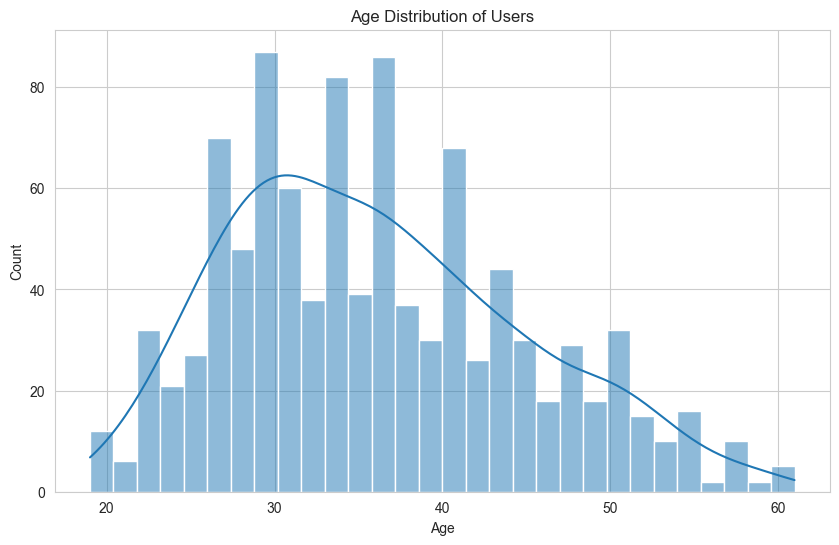

/var/folders/1s/2q951rgd2sj2ccv_8dm1tt9w0000gn/T/ipykernel_5531/939604589.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Clicked on Ad', data=ad_data, palette='viridis')


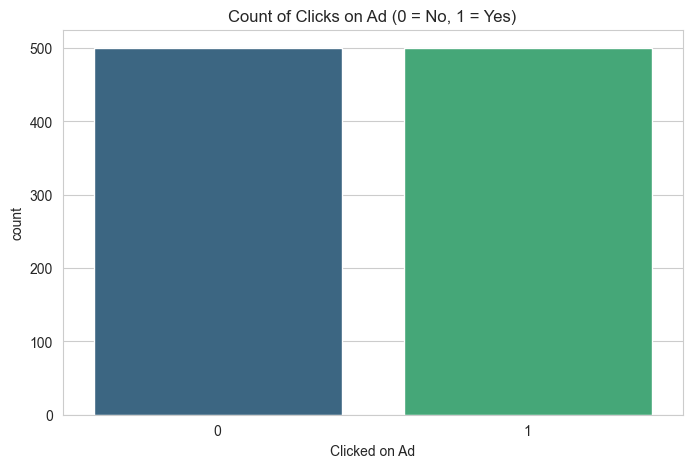

--- Logistic Regression Model has been trained successfully. ---

--- Model Evaluation Metrics ---
Accuracy: 0.9750
Precision: 0.9891
Recall: 0.9579

--- Confusion Matrix ---
[[104   1]
 [  4  91]]


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       105
           1       0.99      0.96      0.97        95

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



/Users/seharfatima/Desktop/connectsphere/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/seharfatima/Desktop/connectsphere/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/seharfatima/Desktop/connectsphere/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept


In [1]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Step 2: Load and Inspect the Data
try:
    # NOTE: Replace 'advertising.csv' with the actual path to your dataset file.
    ad_data = pd.read_csv('advertising.csv')
except FileNotFoundError:
    print("Error: 'advertising.csv' not found. Please ensure the dataset is in the correct directory.")
    exit()

# Display the first few rows and basic info
print("--- Dataset Head ---")
print(ad_data.head())
print("\n--- Dataset Info ---")
ad_data.info()
print("\n--- Descriptive Statistics ---")
print(ad_data.describe())
print("\n")

# Step 3: Exploratory Data Analysis (EDA)
sns.set_style('whitegrid')

# Plotting Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(ad_data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.show()

# Plotting Count of Clicks
plt.figure(figsize=(8, 5))
sns.countplot(x='Clicked on Ad', data=ad_data, palette='viridis')
plt.title('Count of Clicks on Ad (0 = No, 1 = Yes)')
plt.show()

# Step 4: Data Preprocessing and Feature Selection
# Define features (X) and target (y)
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = ad_data['Clicked on Ad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# Step 5: Train the Logistic Regression Model
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train, y_train)
print("--- Logistic Regression Model has been trained successfully. ---\n")

# Step 6: Make Predictions and Evaluate the Model
predictions = logmodel.predict(X_test)

print("--- Model Evaluation Metrics ---")
# Calculate and print Accuracy, Precision, and Recall
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}\n")

# Display the Confusion Matrix
print("--- Confusion Matrix ---")
print(confusion_matrix(y_test, predictions))
print("\n")

# Display the full Classification Report
print("--- Classification Report ---")
print(classification_report(y_test, predictions))